# Solving the n-Queens Problem using Local Search

## Instructions

Total Points: 10

Complete this notebook and submit it. The notebook needs to be a complete project report with 

* your implementation,
* documentation including a short discussion of how your implementation works and your design choices, and
* experimental results (e.g., tables and charts with simulation results) with a short discussion of what they mean. 

Use the provided notebook cells and insert additional code and markdown cells as needed.

## The n-Queens Problem

* __Goal:__ Find an arrangement of $n$ queens on a $n \times n$ chess board so that no queen is on the same row, column or diagonal as any other queen.

* __State space:__ An arrangement of the queens on the board. We restrict the state space to arrangements where there is only a single queen per column. We represent a state as an integer vector $\mathbf{q} = \{q_1, q_2, \dots, q_n\}$, each number representing the row positions of the queens from left to right. We will call a state a "board."

* __Objective function:__ The number of pairwise conflicts (i.e., two queens in the same row/column/diagonal).
The optimization problem is to find the optimal arrangement $\mathbf{q}^*$ of $n$ queens on the board can be written as:

  > minimize: $\mathrm{conflicts}(\mathbf{q})$
  >
  > subject to: $\mathbf{q} \ \text{contains only one queen per column}$

  Note: the constraint (subject to) is enforced by the definition of the state space.

* __Local improvement move:__ Move one queen to a different row in its column.

* __Termination:__ For this problem there is always an arrangement $\mathbf{q}^*$ with $\mathrm{conflicts}(\mathbf{q}^*) = 0$, however, the local improvement moves might end up in a local minimum. 

## Helper functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

np.random.seed(1234)


def random_board(n):
    """Creates a random board of size n x n. Note that only a single queen is placed in each column!"""
    
    return(np.random.randint(0,n, size = n))

def comb2(n): return n*(n-1)//2 # this is n choose 2 equivalent to math.comb(n, 2); // is int division

def conflicts(board):
    """Caclulate the number of conflicts, i.e., the objective function."""

    n = len(board)
    
    horizontal_cnt = [0] * n
    diagonal1_cnt = [0] * 2 * n
    diagonal2_cnt = [0] * 2 * n
    
    for i in range(n):
        horizontal_cnt[board[i]] += 1
        diagonal1_cnt[i + board[i]] += 1
        diagonal2_cnt[i - board[i] + n] += 1
    
    return sum(map(comb2, horizontal_cnt + diagonal1_cnt + diagonal2_cnt))


def show_board(board, cols = ['white', 'gray'], fontsize = 48):  
    """display the board"""
    
    n = len(board)
    
    # create chess board display
    display = np.zeros([n,n])
    for i in range(n):
        for j in range(n):
            if (((i+j) % 2) != 0): 
                display[i,j] = 1
    
    cmap = colors.ListedColormap(cols)
    fig, ax = plt.subplots()
    ax.imshow(display, cmap = cmap, 
              norm = colors.BoundaryNorm(range(len(cols)+1), cmap.N))
    ax.set_xticks([])
    ax.set_yticks([])
    
    # place queens. Note: Unicode u265B is a black queen
    for j in range(n):
        plt.text(j, board[j], u"\u265B", fontsize = fontsize, 
                 horizontalalignment = 'center',
                 verticalalignment = 'center')
    
    print(f"Board with {conflicts(board)} conflicts.")
    plt.show()

## Create a board

Board with 4 conflicts.


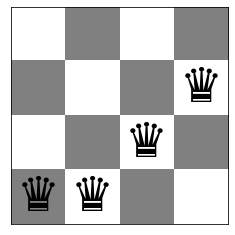

Queens (left to right) are at rows: [3 3 2 1]
Number of conflicts: 4


In [2]:
board = random_board(4)

show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")

A board $4 \times 4$ with no conflicts:

Board with 0 conflicts.


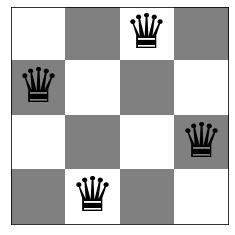

In [3]:
board = [1,3,0,2]
show_board(board)

## Steepest-ascend Hill Climbing Search [3 Points]

Calculate the objective function for all local moves (move each queen within its column) and always choose the best among all local moves. If there are no local moves that improve the objective, then you have reached a local optimum. 

__Definition for local move__

__One local move is defined to be one queen moving up one square or moving down one square in my solutions for all the following questions.__ 

__Description:__

The 'conflict' array stores the number of conflicts of all the possible neighbour states from the current state. Its length is twice as much as the number of queens that can store conflicts after two possible local moves of each queen(go up one step or go down one step).

For example, if there are four queens on the board, the length of 'conflict' array will be 8. Position 0 will store the conflicts after the first queen moves up one step, and position 1 will store the conflicts after the first queen moves down one step. Likewise, postion 2 and 3 for the second queen, 4 and 5 for the third queen, 6 and 7 for the fourth queen. 

In [4]:
def steepest_ascend_hill_climbing_search(board, n):  
    # Record the number of conlficts on the current board
    current_conflict = conflicts(board)
    
    while 1:
        # init the conflict array
        # It stores number of conflicts of all the possible neighbour states from current state
        conflict = [-1 for i in range(2 * n)]
        
        for i in range (n):
            # If queen is not in position 0, then it can go up one step
            if board[i] > 0:
                board[i] -= 1
                conflict[2 * i] = conflicts(board)
                board[i] += 1

            # If queen is not in position n - 1, then it can go down one step
            if board[i] < n - 1:
                board[i] += 1
                conflict[2 * i + 1] = conflicts(board)
                board[i] -= 1

        # Find the best local move
        pos = -1
        for i in range (2 * n):
            if conflict[i] > 0 and conflict[i] < current_conflict:
                current_conflict = conflict[i]
                pos = i
        
        # No better local move exists for current state, return current board as the solution
        if pos == -1:
            return board
    
        # Make the selected best move
        if pos % 2 == 1:
            board[pos//2] += 1
        else:
            board[pos//2] -= 1

## Stochastic Hill Climbing 1 [2 Point]

Chooses randomly from among all uphill moves. Make the probability of the choice proportional to the steepness of the uphill move (i.e., with the improvement in conflicts). 

__Description:__

The 'conflict' array stores the number of conflicts of all the possible neighbour states from the current state. Its length is twice as much as the number of queens that can store conflicts after two possible local moves of each queen(go up one step or go down one step).

For example, if there are four queens on the board, the length of 'conflict' array will be 8. Position 0 will store the conflicts after the first queen moves up one step, and position 1 will store the conflicts after the first queen moves down one step. Likewise, postion 2 and 3 for the second queen, 4 and 5 for the third queen, 6 and 7 for the fourth queen. 

The 'proportion' array stores the assigned probabilities for all good local moves. The way I assign probabilities to good local move depends on the steepness of the uphill move. For example, assume the conflict number of current board is 4. As I describe above, if choice 0(the first queen moves up one step) makes the conflict to 2, chocie 1(the first queen moves down one step) makes the conflict to 1 and choice 2(the second queen moves up one step) makes the conflict to 3. So the steepness for choice 1 would be 2, for choice 2 would be 3 and for choice 3 would be 1. Then generate the 'proportion' array: [0, 0, 1, 1, 1, 2], and equally random choose one number in the array. The probability of choice 2 being choosed will be 2/6, of choice 2 will be 3/6 and choice 3 will be 1/6, which are proportional to the steepness of the uphill move.

In [5]:
import random

def stochastic_hill_climbing_search(board, n):  
    while 1:
        # init the conflict array
        # It stores number of conflicts of all the possible neighbour states from current state
        conflict = [-1 for i in range(2 * n)]
        
        # Record the number of conlficts on the current board
        current_conflict = conflicts(board)
        
        for i in range (n):
            # If queen is not in position 0, then it can go up one step
            if board[i] > 0:
                board[i] -= 1
                conflict[2 * i] = conflicts(board)
                board[i] += 1

            # If queen is not in position n - 1, then it can go down one step
            if board[i] < n - 1:
                board[i] += 1
                conflict[2 * i + 1] = conflicts(board)
                board[i] -= 1

        # Allocate probability for all good moves
        flag = 0
        proportion = []
        for i in range (2 * n):
            if conflict[i] > 0 and conflict[i] < current_conflict:
                for j in range(current_conflict - conflict[i]):
                    proportion.append(i)
                    flag = 1

        # No better local move exists for current state, return current board as the solution
        if flag == 0:
            return board
        
        # Random choose a good local move
        pos = random.choice(proportion)
        if pos % 2 == 1:
            board[pos // 2] += 1
        else:
            board[pos // 2] -= 1

## Stochastic Hill Climbing 2 [2 Point]

A popular version of stochastic hill climbing generates only a single random local neighbor at a time and accept it if it has a better objective function value than the current state. This is very efficient if each state has many possible successor states. This method is called "First-choice hill climbing" in the textbook.

__Notes:__ 

* Detecting local optima is tricky! You can, for example, stop if you were not able to improve the objective function during the last $x$ tries.

__Description:__

Generate a single random local move each time. If it is a good move, accept it. Otherwise, not accept it. In the solution below I designed that if it cannot find a better solution from current state after trying for 100 times, it will stop finding and return the current state as the solution.

In [6]:
import random

def single_random_hill_climbing_search(board, n):  
    # Record the number of conlficts on the current board
    current_conflict = conflicts(board)
    
    while 1:
        count = 0
        while 1:
            count += 1
            
            # Generate a sinlge random local move
            move = random.randint(0, 2 * n - 1)
            
            # Check if the move is possible(not moving a queen on position 0 up one step)
            if move % 2 == 1 and board[move // 2] < n - 1:
                board[move // 2] += 1
                
                # If it is a good move, make the move
                if conflicts(board) < current_conflict:
                    current_conflict = conflicts(board)
                    break
                    
                # If it is a bad move, don't make the move
                else:
                    board[move // 2] -= 1

            # Check if the move is possible(not moving a queen on position n-1 down one step)
            if move % 2 == 0 and board[move // 2] > 0:
                board[move // 2] -= 1
                
                # If it is a good move, make the move
                if conflicts(board) < current_conflict:
                    current_conflict = conflicts(board)
                    break
                    
                # If it is a bad move, don't make the move
                else:
                    board[move // 2] += 1
            
            # If cannot improve the objective function during the last 100 tries, return the current board as the solution
            if count == 100: 
                return board

## Hill Climbing Search with Random Restarts [1 Point]

Hill climbing will often end up in local optima. Restart the each of the three hill climbing algorithm up to 100 times with a random board to find a better (hopefully optimal) solution. Note that restart just means to run the algoithm several times with a new random initialization.  

In [7]:
def random_starts(times, n, strategy):
    # Set the seed so that it will genertate the same random board every time
    np.random.seed(10)
    init_board = random_board(n)
    board_solution = init_board
    conflict_solution = conflicts(init_board)
    
    # Steepest-assend Hilling Climbing Search
    if strategy == 'SAHC':
        for i in range (times): 
            np.random.seed(10)
            init_board = random_board(n)
            current_board = steepest_ascend_hill_climbing_search(init_board, n)
            
            if conflicts(current_board) < conflict_solution:
                conflict_solution = conflicts(current_board)
                board_solution = current_board
        print(f"Solution of Steepest-ascend Hilling Climbing: {conflicts(board_solution)} conflicts")
        
    # Stochastic Hilling Climbing Search 1
    elif strategy == "SHC1":
        for i in range (times): 
            np.random.seed(10)
            init_board = random_board(n)
            current_board = stochastic_hill_climbing_search(init_board, n)
            
            if conflicts(current_board) < conflict_solution:
                conflict_solution = conflicts(current_board)
                board_solution = current_board
        print(f"Solution of Stochastic Hilling Climbing 1: {conflicts(board_solution)} conflicts")
        
    # Stochastic Hilling Climbing Search 2
    elif strategy == "SHC2":
        for i in range (times): 
            np.random.seed(10)
            init_board = random_board(n)
            current_board = single_random_hill_climbing_search(init_board, n)
            
            if conflicts(current_board) < conflict_solution:
                conflict_solution = conflicts(current_board)
                board_solution = current_board
        print(f"Solution of Stochastic Hilling Climbing 2: {conflicts(board_solution)} conflicts")

In [8]:
random_starts(100, 50, "SAHC")
random_starts(100, 50, "SHC1")
random_starts(100, 50, "SHC2")

Solution of Steepest-ascend Hilling Climbing: 23 conflicts
Solution of Stochastic Hilling Climbing 1: 19 conflicts
Solution of Stochastic Hilling Climbing 2: 24 conflicts


## Compare Performance [2 Points]

Use runtime and objective function value to compare the algorithms. 

* Use boards of different sizes to explore how the different algorithms perform. Make sure that you run the algorithms for each board size several times (at least 10 times) with different starting boards and report averages.

* How do the algorithms scale with problem size?

* What is the largest board each algorithm can solve in a reasonable amount time?

The example below times creating 100 random boards and calculating the conflicts. Reported is the average run time over `N = 100` runs.

For timing you can use the `time` package.

In [9]:
import time

N = 100
total = 0

for i in range(N):
    t0 = time.time()
    for i in range(1,100): conflicts(random_board(8))
    t1 = time.time()
    total += t1 - t0

tm = total/N
    
print(f"This took: {tm * 1e3} milliseconds")

This took: 2.031233310699463 milliseconds


The `timit` package is useful to measure time for code that is called repeatedly.

__Description:__

In the performance comparasion part, I choose 5 diffenent board size which are 10 * 10, 20 * 20, 40 * 40, 80 * 80, 100 * 100. Since the different board size have integer mutiple relationship, I can easily see how runtime related to problem size for each algorithm. For example, we can say that problem size of board 40 * 40 is twice as much as problem size of board 20 * 20. So, If we compare the runtime for one algorithm to solve these two boards, we can easily find how problem size influent algorithm's performance.

In [10]:
import timeit

N = 100

tm = timeit.timeit('for i in range(1,100): conflicts(random_board(8))', 
                   globals = globals(), number = N)/N

print(f"This took: {tm * 1e3} milliseconds")

This took: 2.0279860000300687 milliseconds


__Answer: Algorithm Performance__

In [11]:
def performance_sahc():
    board_size = [10, 20, 40, 80, 100]
    sahc_time = []
    sahc_conflicts = []
    for i in board_size:
        total = 0
        t0 = time.time()

        conflict = 0
        for j in range (10): 
            init_board = random_board(i)
            steepest_ascend_hill_climbing_search(init_board, i)
            conflict += conflicts(steepest_ascend_hill_climbing_search(init_board, i))

        t1 = time.time()
        total = t1 - t0
        runtime = round(total / 10, 5)
        conflict /= 10
        sahc_time.append(runtime)
        sahc_conflicts.append(conflict)
        print(f"Average performance of steepest-asend hilling climbing search to solve a {i} * {i} board: {runtime} seconds, {conflict} conflicts")
    return sahc_time, sahc_conflicts
        
def performance_shc1():
    board_size = [10, 20, 40, 80, 100]
    shc1_time = []
    shc1_conflicts = []
    for i in board_size:
        total = 0
        t0 = time.time()

        conflict = 0
        for j in range (10): 
            init_board = random_board(i)
            stochastic_hill_climbing_search(init_board, i)
            conflict += conflicts(stochastic_hill_climbing_search(init_board, i))

        t1 = time.time()
        total = t1 - t0
        runtime = round(total / 10, 5)
        conflict /= 10
        shc1_time.append(runtime)
        shc1_conflicts.append(conflict)
        print(f"Average time of stochastic hilling climbing search 1 to solve a {i} * {i} board: {runtime} seconds, {conflict} conflicts")
    return shc1_time, shc1_conflicts
        
def performance_shc2():
    board_size = [10, 20, 40, 80, 100]
    shc2_time = []
    shc2_conflicts = []
    for i in board_size:
        total = 0
        t0 = time.time()

        conflict = 0
        for j in range (10): 
            init_board = random_board(i)
            single_random_hill_climbing_search(init_board, i)
            conflict += conflicts(single_random_hill_climbing_search(init_board, i))

        t1 = time.time()
        total = t1 - t0
        runtime = round(total / 10, 5)
        conflict /= 10
        shc2_time.append(runtime)
        shc2_conflicts.append(conflict)
        print(f"Average time of stochastic hilling climbing search 2 to solve a {i} * {i} board: {runtime} seconds, {conflict} conflicts")
    return shc2_time, shc2_conflicts

In [12]:
(sahc_time, sahc_conflicts) = performance_sahc()
(shc1_time, shc1_conflicts) = performance_shc1()
(shc2_time, shc2_conflicts) = performance_shc2()

Average performance of steepest-asend hilling climbing search to solve a 10 * 10 board: 0.00206 seconds, 4.0 conflicts
Average performance of steepest-asend hilling climbing search to solve a 20 * 20 board: 0.00894 seconds, 9.6 conflicts
Average performance of steepest-asend hilling climbing search to solve a 40 * 40 board: 0.05619 seconds, 18.9 conflicts
Average performance of steepest-asend hilling climbing search to solve a 80 * 80 board: 0.38183 seconds, 38.4 conflicts
Average performance of steepest-asend hilling climbing search to solve a 100 * 100 board: 0.70041 seconds, 51.5 conflicts
Average time of stochastic hilling climbing search 1 to solve a 10 * 10 board: 0.00147 seconds, 4.5 conflicts
Average time of stochastic hilling climbing search 1 to solve a 20 * 20 board: 0.00791 seconds, 10.8 conflicts
Average time of stochastic hilling climbing search 1 to solve a 40 * 40 board: 0.05743 seconds, 19.0 conflicts
Average time of stochastic hilling climbing search 1 to solve a 80 *

Use 5 boards of different sizes to compare the runtime of three different algorithms. Run the algorithms for each board size 10 times with different starting boards.

| Algorithm     | 10 * 10 | 20 * 20 | 40 * 40 | 80 * 80 | 100 * 100 |
|-----------------|-----------------|-----------------|-----------------|-----------------|-----------------|
|  Steepest-ascend Hill Climbing   |0.00206 |0.00894 |0.05619 |0.38183 |0.70041 |
|  Stochastic Hill Climbing 1 |0.00147 |0.00791 |0.05743 |0.47207 |0.85056 |
|  Stochastic Hill Climbing 2 |0.00304 |0.00784 |0.02177 |0.05528 |0.07476 |

Use 5 boards of different sizes to compare the conflicts of three different algorithms. Run the algorithms for each board size 10 times with different starting boards.

| Algorithm     | 10 * 10 | 20 * 20 | 40 * 40 | 80 * 80 | 100 * 100 |
|-----------------|-----------------|-----------------|-----------------|-----------------|-----------------|
|  Steepest-ascend Hill Climbing   |4.0 |9.6 |18.9 |38.4 |51.5 |
|  Stochastic Hill Climbing 1 |4.5 |10.8 |19.0 |42.9 |53.0 |
|  Stochastic Hill Climbing 2 |4.3 |8.8 |21.4 |43.7 |51.4 |

__Answer: Algorithms Scale with Problem Size__

__Conclusion:__
As the problem size becomes to n times, runtime of Steepest-ascend Hill Climbing Algorithm and Stochastic Hill Climbing 1 Algorithm always becomes to n^3 times. While runtime of Stochastic Hill Climbing 2 Algorithm always becomes to n times. That is to say, Stochastic Hill Climbing 2 Algorithm always scales linear with the growth of problem size.

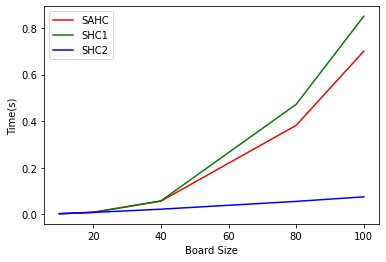

In [13]:
import matplotlib.pyplot as plt

x = [10, 20, 40, 80, 100]
plt.plot(x, sahc_time, color = 'r',label="SAHC")
plt.plot(x, shc1_time, color = 'g',label="SHC1")
plt.plot(x, shc2_time, color = 'b',label="SHC2")
plt.xlabel("Board Size")
plt.ylabel("Time(s)")
plt.legend(loc = "best")
plt.show()

__Conclusion:__
When the problem size increases n times, average time for Steepest-ascend Hill Climbing Algorithm and Stochastic Hill Climbing 1 Algorithm to come out with a solution increases like n^2 ~ n^3 times, while average time for Stochastic Hill Climbing 2 Algorithm to come out with a solution increases n times. Stochastic Hill Climbing 2 Algorithm scales linear with the problem size. 

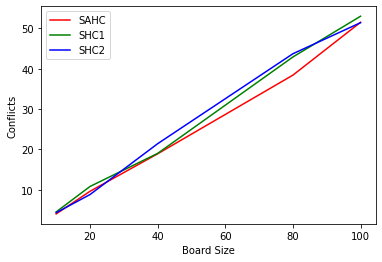

In [14]:
import matplotlib.pyplot as plt

x = [10, 20, 40, 80, 100]
plt.plot(x, sahc_conflicts, color = 'r',label="SAHC")
plt.plot(x, shc1_conflicts, color = 'g',label="SHC1")
plt.plot(x, shc2_conflicts, color = 'b',label="SHC2")
plt.xlabel("Board Size")
plt.ylabel("Conflicts")
plt.legend(loc = "best")
plt.show()

__Conclusion:__
As the problem size increases, Steepest-ascend Hill Climbing Algorithm, Stochastic Hill Climbing 1 Algorithm and Stochastic Hill Climbing 2 Algorithm always perform the same. They scale linear with the growth of problem size.

__Answer: largest board each algorithm can solve in a reasonable amount time__

In this part, I define a reasonable time to be aound 20~30 seconds, and run all three algorithms on the board as large as I can without breaking the time limit.

In [15]:
def largest_board_sahc(n):
    total = 0
    t0 = time.time()
    
    init_board = random_board(n)
    steepest_ascend_hill_climbing_search(init_board, n)
        
    t1 = time.time()
    total = t1 - t0
    print(f"Time of steepest-asend hilling climbing search to solve a {n} * {n} board: {total} seconds")
    
def largest_board_shc1(n):
    total = 0
    t0 = time.time()
    
    init_board = random_board(n)
    stochastic_hill_climbing_search(init_board, n)
        
    t1 = time.time()
    total = t1 - t0
    print(f"Time of stochastic hilling climbing search 1 to solve a {n} * {n} board: {total} seconds")
    
def largest_board_shc2(n):
    total = 0
    t0 = time.time()
    
    init_board = random_board(n)
    single_random_hill_climbing_search(init_board, n)
        
    t1 = time.time()
    total = round(t1 - t0, 2)
    print(f"Time of stochastic hilling climbing search 2 to solve a {n} * {n} board: {total} seconds")

In [16]:
largest_board_sahc(300)
largest_board_shc1(300)
largest_board_shc2(3000)

Time of steepest-asend hilling climbing search to solve a 300 * 300 board: 19.707681894302368 seconds
Time of stochastic hilling climbing search 1 to solve a 300 * 300 board: 23.28610396385193 seconds
Time of stochastic hilling climbing search 2 to solve a 3000 * 3000 board: 36.94 seconds


| Algorithm     | Board Size | Time(s) | 
|-----------------|-----------------|-----------------|
|  Steepest-ascend Hill Climbing   |300 * 300 |19.70 | 
|  Stochastic Hill Climbing 1 |300 * 300 |23.28 | 
|  Stochastic Hill Climbing 2 |3000 * 3000 |36.94 | 

## Graduate student advanced task: Simulated Annealing [1 Point]
Undergraduate students: This is a bonus task you can attempt if you like [+1 Bonus point].

Simulated annealing is a form of stochastic hill climbing that avoid local optima by also allowing downhill moves with a probability proportional to a temperature. The temperature is decreased in every iteration following an annealing schedule. You have to experiment with the annealing schedule (Google to find guidance on this).

Implement simulated annealing for the n-Queens problem and compare its performance with the previouse algorithms.

__Description:__

Generate a random local move each time. If it is a good local move, accpet it. If it is a bad move, using e^(-∆E/T) to generate probability of accepting this bad move. I choose fast cooling schedule in following solution.

In [17]:
import random
import math

def simulated_annealing(board, n):  
    # Record the number of conflicts on the current board
    current_conflict = conflicts(board)
    
    # Set the initial temperature
    temperature = n
    t = 1
    
    while t:
        # Random choose a move
        move = random.randint(0, 2 * n - 1)
        
        if move % 2 == 1 and board[move // 2] < n - 1:
            board[move // 2] += 1
            
            # If it is a good move, accept
            if conflicts(board) < current_conflict:
                current_conflict = conflicts(board)
                
            else:
                # Use e^(-∆E/T) to generate the probability of accepting a bad move
                e = math.exp((current_conflict - conflicts(board)) * (1 + t)/ temperature)
                probability = np.random.choice([0, 1], p = [e, 1 - e]) 
                
                if probability == 0:
                    current_conflict = conflicts(board)
                else:
                    board[move // 2] -= 1

        if move % 2 == 0 and board[move // 2] > 0:
            board[move // 2] -= 1
            
            # If it is a good move, accept
            if conflicts(board) < current_conflict:
                current_conflict = conflicts(board)
                
            else:
                # Use e^(-∆E/T) to generate the probability of accepting a bad move
                e = math.exp((current_conflict - conflicts(board)) * (1 + t)/ temperature)
                probability = np.random.choice([0, 1], p = [e, 1 - e]) 
                
                if probability == 0:
                    current_conflict = conflicts(board)
                else:
                    board[move // 2] += 1

        # If the temperature declines smaller than 0.01, return the current state as the solution
        if temperature / (1 + t) < 0.01:
            return board
        
        t += 1

__Description:__

I run the simulated annealing algorithm on the 5 different boards that is same as the boards run with three alogorithms above. So that I can easily compare the performance difference between simulated annealing algorithm and other three algorithms in runtime and remaining conflicts.

In [18]:
def performance_sa():
    board_size = [10, 20, 40, 80, 100]
    sa_time = []
    sa_conflicts = []
    for i in board_size:
        total = 0
        t0 = time.time()

        conflict = 0
        for j in range(10):
            init_board = random_board(i)
            simulated_annealing(init_board, i)
            conflict += conflicts(simulated_annealing(init_board, i))

        t1 = time.time()
        total = t1 - t0
        runtime = round(total / 10, 5)
        conflict /= 10
        sa_time.append(runtime)
        sa_conflicts.append(conflict)
        print(f"Average time of simulated annealing to solve a {i} * {i} board: {runtime} seconds, {conflict} conflicts")
    return sa_time, sa_conflicts
        
(sa_time, sa_conflicts) = performance_sa()

Average time of simulated annealing to solve a 10 * 10 board: 0.09358 seconds, 1.9 conflicts
Average time of simulated annealing to solve a 20 * 20 board: 0.29867 seconds, 4.5 conflicts
Average time of simulated annealing to solve a 40 * 40 board: 1.03941 seconds, 9.0 conflicts
Average time of simulated annealing to solve a 80 * 80 board: 3.79986 seconds, 20.0 conflicts
Average time of simulated annealing to solve a 100 * 100 board: 5.64271 seconds, 25.7 conflicts


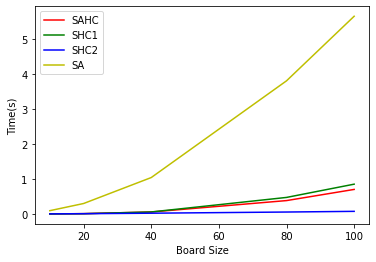

In [19]:
import matplotlib.pyplot as plt

x = [10, 20, 40, 80, 100]
plt.plot(x, sahc_time, color = 'r',label="SAHC")
plt.plot(x, shc1_time, color = 'g',label="SHC1")
plt.plot(x, shc2_time, color = 'b',label="SHC2")
plt.plot(x, sa_time, color = 'y',label="SA")
plt.xlabel("Board Size")
plt.ylabel("Time(s)")
plt.legend(loc = "best")
plt.show()

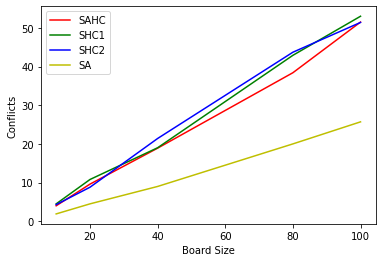

In [20]:
import matplotlib.pyplot as plt

x = [10, 20, 40, 80, 100]
plt.plot(x, sahc_conflicts, color = 'r',label="SAHC")
plt.plot(x, shc1_conflicts, color = 'g',label="SHC1")
plt.plot(x, shc2_conflicts, color = 'b',label="SHC2")
plt.plot(x, sa_conflicts, color = 'y',label="SA")
plt.xlabel("Board Size")
plt.ylabel("Conflicts")
plt.legend(loc = "best")
plt.show()

__Conclusion:__

From the chart above we can tell that using the above Simulated Annealing Algorithm, we can always get a better solution than other three algorithms on all size of boards. However, it always takes much more time.

## More things to do
Implement a Genetic Algorithm for the n-Queens problem.